# COGS 108 - Final Project 

# Overview

I intended to see if higher yelp scores correlated with more reviews and this correlated to more park visitations. I concluded that it did not due to there being a poor correlation between the number of reviews and the yelp score.

# Name & GitHub

- Name: Allen Do
- GitHub Username: ald031

# Research Question

Do higher yelp scores yield more reviews and thus affect the number of visits to San Diego parks?

## Background and Prior Work

Studies have found that people are more likely to use a park if it offers specific qualities which are desired (1). They tend to favor this over something like a general park or space. Reference 1 found that residents near certain parks avoided them due to concerns about safety and a lack of desired programs at that park. It ultimately concluded that the most important correlate of park use and park-based physical activity was park programming.

The city of San Diego uses a similar idea of surveying and analyzing demographic data in order to determine what attracts park goers as outlined in its 2016 master plan (2). They go over the 2016 San Diego demographic makeup, projected demographic makeup, activity frequency, facility usage, and population density. Using this data they were able to find that walking and family gatherings were the most popular activity for parks. They also found that sightseeing and fishing were slowly growing in popularity. The population is projected to be comprised of more older people, and younger generations were less likely to use the park. They also found that the Hispanic population, which was projected to grow, was having trouble accessing facilities as there were none near their communities. They were able to come up with plans in order to address these qualities due to this.

In short, Reference 2 found that the popularity and usage of a park was heavily related to the demographics of an area and that demographic's preferences. In order to retain or attain more of that demographic, the park plans were drafted to enhance or grow qualities that those demographics favored. 

References (include links):
- 1)https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3667219/
- 2)https://www.sandiegocounty.gov/content/dam/sdc/parks/CAPRA/2.0%20EXHIBITS/2.4A%20Master%20Plan.pdf

# Hypothesis


Positive yelp scores will tend to cause higher park usage, and thus there will be more reviews and visits for certain parks. 

People will look at positive scores for parks first and filter them out for qualities that they desire. This means that poor Yelp reviews will reinforce poor visitation counts and thus there will not be a lot of reviews for low score parks at all. This means that those parks are less likely to get further support, they are less likely to ever change their poor visitation counts.

# Dataset(s)

- Dataset Name: yelp_SD_parks
- Link to the dataset: https://github.com/COGS108/individual_fa20/blob/master/data/yelp_SD_parks.csv
- Number of observations: 833 observations

This is a csv file containing parks, their location, the park's longitude and latitude, their overall yelp score, number of yelp reviews, closed status, phone number of the park if applicable, and the link to their respective yelp pages.


# Setup

In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
   
import seaborn as sns
sns.set()
sns.set_context('talk')

import warnings
warnings.filterwarnings('ignore')

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest
# Note: the statsmodels import may print out a 'FutureWarning'. Thats fine.

In [2]:
df_yelp = pd.read_csv("yelp_SD_parks.csv")

# Data Cleaning

Describe your data cleaning steps here.

In [3]:
#Removing uncessary info and columns. Also rearranging to sort by review_count.
df_yelp = df_yelp.sort_values(by=['review_count'], ascending = False)


#filter to kick out weird places not in San Diego
df_yelp = df_yelp[df_yelp['latitude']<33]
df_yelp = df_yelp[df_yelp['latitude']>32.7]


df_yelp = df_yelp.drop(columns = ['phone', 'longitude', 'latitude', 'is_closed'])


In [4]:
#rearranging the order of the columns for easier viewing.
df_yelp = df_yelp[['name','rating','review_count', 'address','url','id']]



In [5]:
#filtering for things that have park or preserve in the name to remove most restaurants, businesses, 
#or redundant things that are not parks.
df_yelp = df_yelp[df_yelp['name'].str.contains('Park|Preserve')]


df_yelp.shape
#removing odd outlier entries that got past the filter. They are apartments,streets,restaurants or something else with weird 
#names that include park/preserve
#Also removing redundant things like the playground/rec centre inside of a park that already has an entry.

df_yelp = df_yelp.drop(145)
df_yelp = df_yelp.drop(726)
df_yelp = df_yelp.drop(670)
df_yelp = df_yelp.drop(116)
df_yelp = df_yelp.drop(674)
df_yelp = df_yelp.drop(778)
df_yelp = df_yelp.drop(672)
df_yelp = df_yelp.drop(608)
df_yelp = df_yelp.drop(164)
df_yelp = df_yelp.drop(182)
df_yelp = df_yelp.drop(140)
df_yelp = df_yelp.drop(772)
df_yelp = df_yelp.drop(673)
df_yelp = df_yelp.drop(136)
df_yelp = df_yelp.drop(21)
df_yelp = df_yelp.drop(163)
df_yelp = df_yelp.drop(169)
df_yelp = df_yelp.drop(353)
df_yelp = df_yelp.drop(492)
df_yelp = df_yelp.drop(355)
df_yelp = df_yelp.drop(64)
df_yelp = df_yelp.drop(131)
df_yelp = df_yelp.drop(362)





In [6]:
df_yelp.rename({'name': 'Park Name', 'rating': "Yelp Rating", 'review_count': "Number of Reviews"}, axis=1, inplace=True)

In [7]:
df_yelp = df_yelp.reset_index(drop = True)
df_yelp.head()

,Park Name,Yelp Rating,Number of Reviews,address,url,id
0,Balboa Park,5.0,2105,"1549 El Prado San Diego, CA 92101",https://www.yelp.com/biz/balboa-park-san-diego...,9M_FW_-Ipx93I36w-_ykBg
1,Petco Park,4.0,1667,"100 Park Blvd San Diego, CA 92101",https://www.yelp.com/biz/petco-park-san-diego?...,HkgSbRLVMRHExsRkImIK5A
2,Encontro North Park,4.5,1127,"3001 University Ave San Diego, CA 92104",https://www.yelp.com/biz/encontro-north-park-s...,ah1wsendgkhUtTSR-MVDZw
3,Sunset Cliffs Natural Park,5.0,935,"1253 Sunset Cliffs Blvd San Diego, CA 92107",https://www.yelp.com/biz/sunset-cliffs-natural...,uSImc0RtxHPMh7CO0BDUmw
4,Belmont Park,4.0,669,"3146 Mission Blvd San Diego, CA 92109",https://www.yelp.com/biz/belmont-park-san-dieg...,#NAME?


Clean Up Summary:
1. I filtered the entries to get an approximately correct range for longitude and latitude that would give me entries only inside of San Diego.
2. I removed columns that had no further use or importance, and I rearranged the columns for easier viewing.
3. I manually filtered out entries that got past the filter; these were entries that were not parks or preserves

# Data Analysis & Results

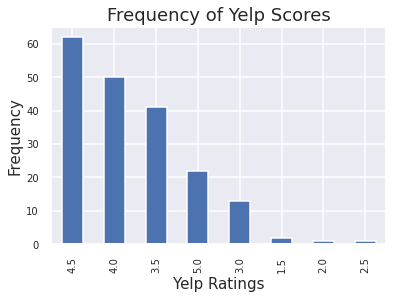

In [8]:
#Show distribution of overall ratings.
ax = df_yelp["Yelp Rating"].value_counts().plot.bar()
ax.axes.set_title('Frequency of Yelp Scores', fontsize= 18,)
ax.set_xlabel("Yelp Ratings",fontsize=15)
ax.set_ylabel("Frequency",fontsize=15)
ax.tick_params(labelsize=10)

In [9]:
#show the number reviews in each rating.
score = df_yelp.groupby(df_yelp["Yelp Rating"]).sum()
score = score.sort_values(by=['Number of Reviews'], ascending=False)
print(score)

             Number of Reviews
Yelp Rating                   
4.0                       4412
4.5                       4236
5.0                       3209
3.5                       1190
3.0                        307
2.5                         23
1.5                         20
2.0                          8


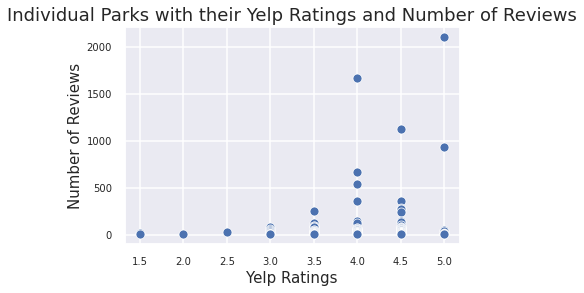

In [10]:
#Show rating relative to review count of parks
score = df_yelp.groupby(df_yelp["Yelp Rating"])
ax = sns.scatterplot(x=df_yelp["Yelp Rating"], y=df_yelp["Number of Reviews"])
ax.axes.set_title('Individual Parks with their Yelp Ratings and Number of Reviews', fontsize= 18,)
ax.set_xlabel("Yelp Ratings",fontsize=15)
ax.set_ylabel("Number of Reviews",fontsize=15)
ax.tick_params(labelsize=10)

In [11]:
corrs = df_yelp.corr()
print(corrs)

                   Yelp Rating  Number of Reviews
Yelp Rating           1.000000           0.126508
Number of Reviews     0.126508           1.000000


There appears to be a fairly low correlation between yelp ratings and the number of reviews that it gets

# Ethics & Privacy

Privacy: The information from the dataset has public information that doesn't identify anyone. The phone numbers that were removed were for public offices that maintained the parks. They did not need to be removed, but they did not provide any relevant information so I mainly removed them for readability.

Ethics: The information gathered is centered on San Diego parks, and these review numbers are not necessarily up to date as a quick google search shows for some of these parks. These results should not be applied to other parks in other areas. In addition, these results should not apply to other types of businesses or things in other areas or things in San Diego. I must also state that there is a heavy bias in how Yelp works. Anyone can post their review of the place on Yelp. This data thus does not accurately represent how all denizens of San Diego or a San Diego neighbordhood view their parks. In addition, it is not an accurate measure of how many people visit a park as not everyone that goes will post to yelp. Additionally, not every individual that goes to a park in a group will post a review 

# Conclusion & Discussion

Based on this analysis, I can conclude that my hypothesis cannot be supported. There isn't a very strong correlation between the yelp scores and the number of reviews. I cannot support my claim that more positive yelp scores mean higher park usage or even more reviews and visits to a park. I also cannot conclude or support that yelp causes poor visitation of parks with low ratings.

A limitation of my data set was that I did not know who or from where the yelp reviews were coming from. I thus cannot address some of the bias that the yelp system presents. I cannot conclude anything about who is visiting, what time they are visiting, or how many people are visiting. I do not know when the yelp reviews were made, so I also cannot conclude anything about the popularity of a park.